In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.gridspec as gridspec
import matplotlib.colors as colors
import matplotlib.lines as mlines
from scipy.stats import sem
from scipy.optimize import curve_fit
import h5py
from pathlib import Path
from collections.abc import Iterable
from matplotlib.colors import LogNorm

In [2]:
datapath = Path.cwd()

In [3]:
figurepath = Path.cwd().parent / "figures"

In [4]:
W = 5.88    # Figure width in inches, approximately A4-width - 2*1.25in margin
plt.rcParams.update({
    'figure.figsize': (W, W),#/(4/3)),     # 1:1 aspect ratio
    'font.size' : 11,                   # Set font size to 11pt
    'axes.labelsize': 11,               # -> axis labels
    'legend.fontsize': 10,              # -> legends
    'font.family': 'lmodern',
    'text.usetex': True,
    'text.latex.preamble': (            # LaTeX preamble
        r'\usepackage{lmodern}'
        # ... more packages if needed
    )
})

In [5]:
def set_size(width='thesis', fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987  
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    aspect_ratio = 1#(5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * aspect_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)


In [6]:
filenames1 = ["positions_ncpbc_{}.jld2".format(i) for i in [1.99,1.8,1.5,1.2,0.9,0.6]]
filenames2 = ["positions_boxpbc_{}.jld2".format(i) for i in [1.5,1.2,0.9,0.6]]
desc1 = []
desc2 = []
pos1 = []
pos2 = []
dist1 = []
dist2 = []
Js1 = []
Js2 = []

for i in range(len(filenames1)):
    with h5py.File(datapath/filenames1[i],"r") as f:
        desc1.append(f["descriptor"][()])
        pos1.append(f["positions"][()])
        dist1.append(f["distances"][()])

for i in range(len(filenames2)):
    with h5py.File(datapath/filenames2[i],"r") as f:
        desc2.append(f["descriptor"][()])
        pos2.append(f["positions"][()])
        dist2.append(f["distances"][()])


for i in range(len(filenames1)):
    pos1[i] = np.swapaxes(pos1[i],0,1)
    dist1[i] = np.swapaxes(dist1[i],0,2)
    Js1.append(np.power(dist1[i],-6))
for i in range(len(filenames2)):
    pos2[i] = np.swapaxes(pos2[i],0,1)
    dist2[i] = np.swapaxes(dist2[i],0,2)
    Js2.append(np.power(dist2[i],-6))

/tmp/ipykernel_5967/2653111256.py:28: RuntimeWarning: divide by zero encountered in power
  Js1.append(np.power(dist1[i],-6))
/tmp/ipykernel_5967/2653111256.py:32: RuntimeWarning: divide by zero encountered in power
  Js2.append(np.power(dist2[i],-6))


# Plots

In [7]:
N = 13
rhos1 = [1.99,1.8,1.5,1.2,0.9,0.6]
rhos2 = [1.5,1.2,0.9,0.6]

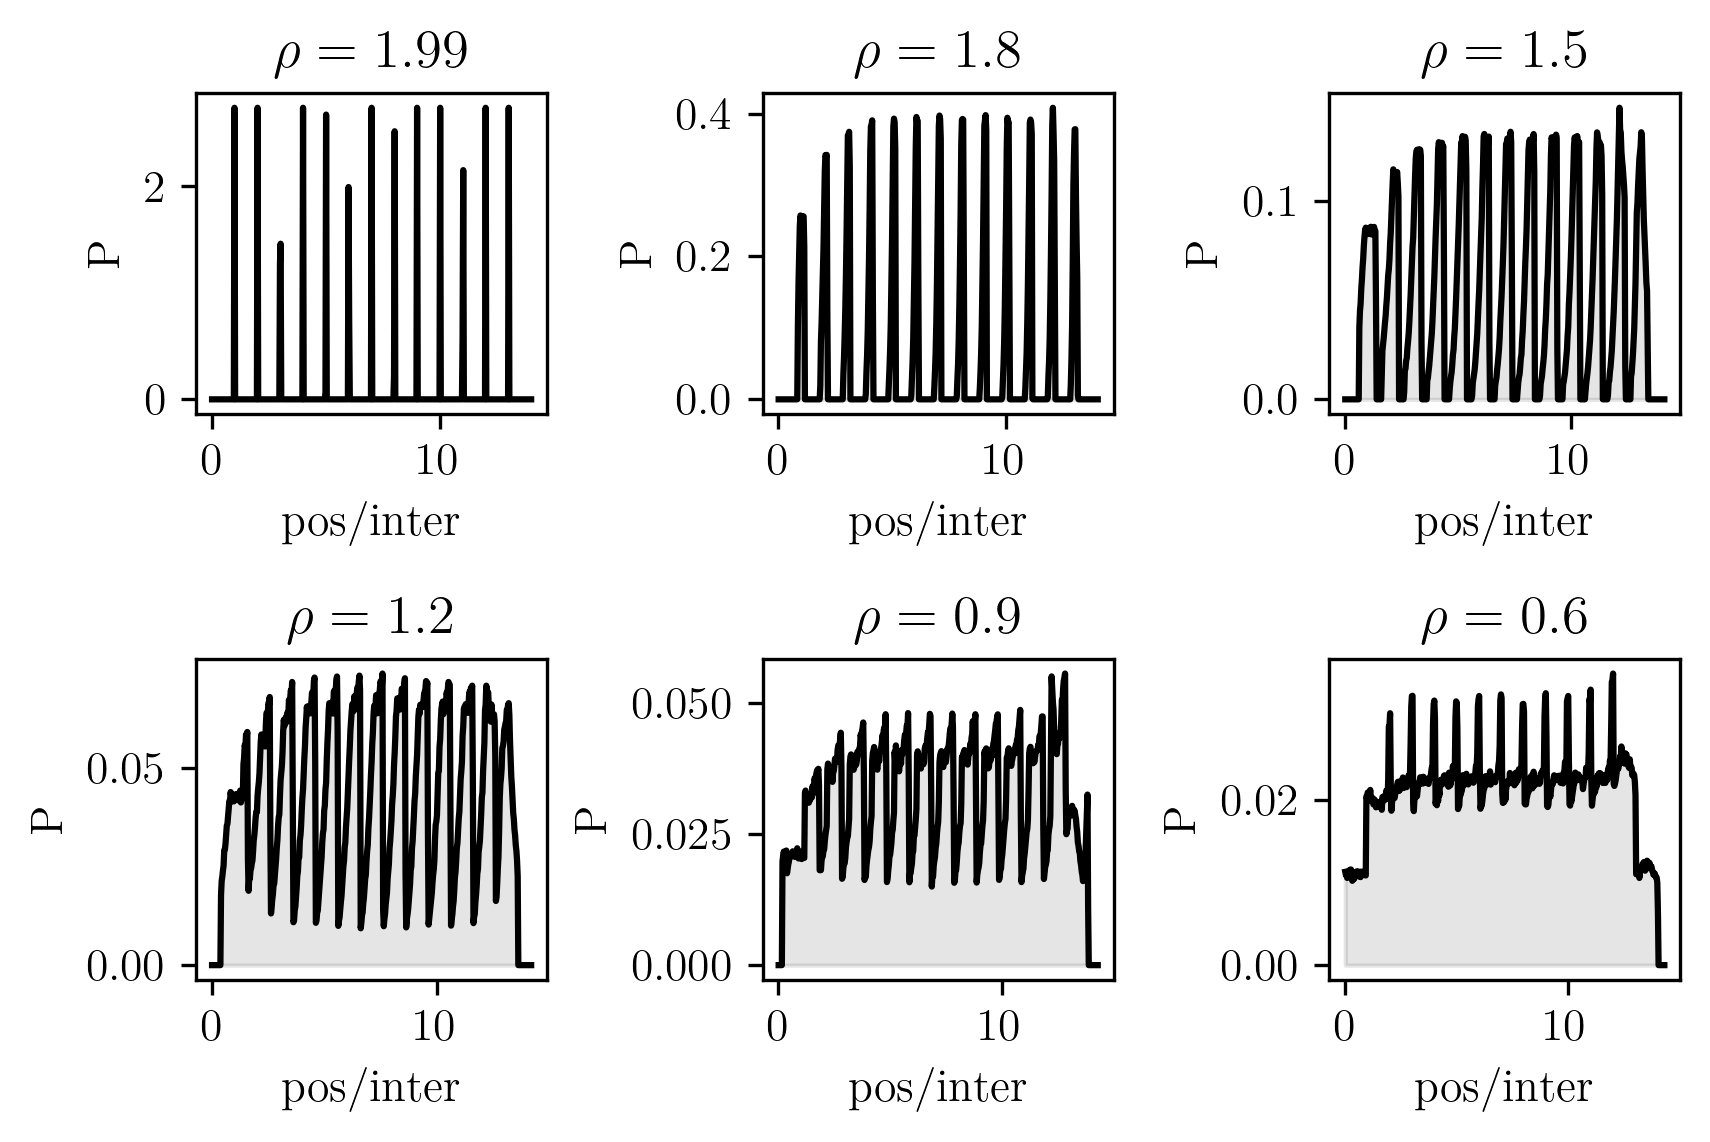

In [8]:
fig,axs = plt.subplots(2,3,figsize=set_size(subplots=(2,3)),dpi=300,sharey=False)

Nbins = 500

for i in range(0,3):
    s = 2/rhos1[i]
    bin_edges = np.linspace(0,pos1[i].max()+1,Nbins)
    l = bin_edges[1]-bin_edges[0]
    p,x = np.histogram(pos1[i],bins=bin_edges,density=True)
    x = x[:-1] + (x[1] - x[0])/2   # convert bin edges to centers
    x = x/s
    axs[0,i].plot(x,p,color="black")
    axs[0,i].fill_between(x,np.zeros(Nbins-1),p,alpha=0.1,color="black")
    axs[0,i].set_title(r"$\rho = {}$".format(rhos1[i]))
    axs[0,i].set_ylabel("P")
    axs[0,i].set_xlabel("pos/inter")

for i in range(0,3):
    s = 2/rhos1[i+3]
    bin_edges = np.linspace(0,pos1[i+3].max()+1,Nbins)
    l = bin_edges[1]-bin_edges[0]
    p,x = np.histogram(pos1[i+3],bins=bin_edges,density=True)
    x = x[:-1] + (x[1] - x[0])/2   # convert bin edges to centers
    x = x/s
    axs[1,i].plot(x,p,color="black")
    axs[1,i].fill_between(x,np.zeros(Nbins-1),p,alpha=0.1,color="black")
    axs[1,i].set_title(r"$\rho = {}$".format(rhos1[i+3]))
    axs[1,i].set_ylabel("P")
    axs[1,i].set_xlabel("pos/inter")


plt.tight_layout()
#plt.savefig(figurepath/"short_time_r=0.pdf",format="pdf",bbox_inches='tight',dpi=600)
plt.show()

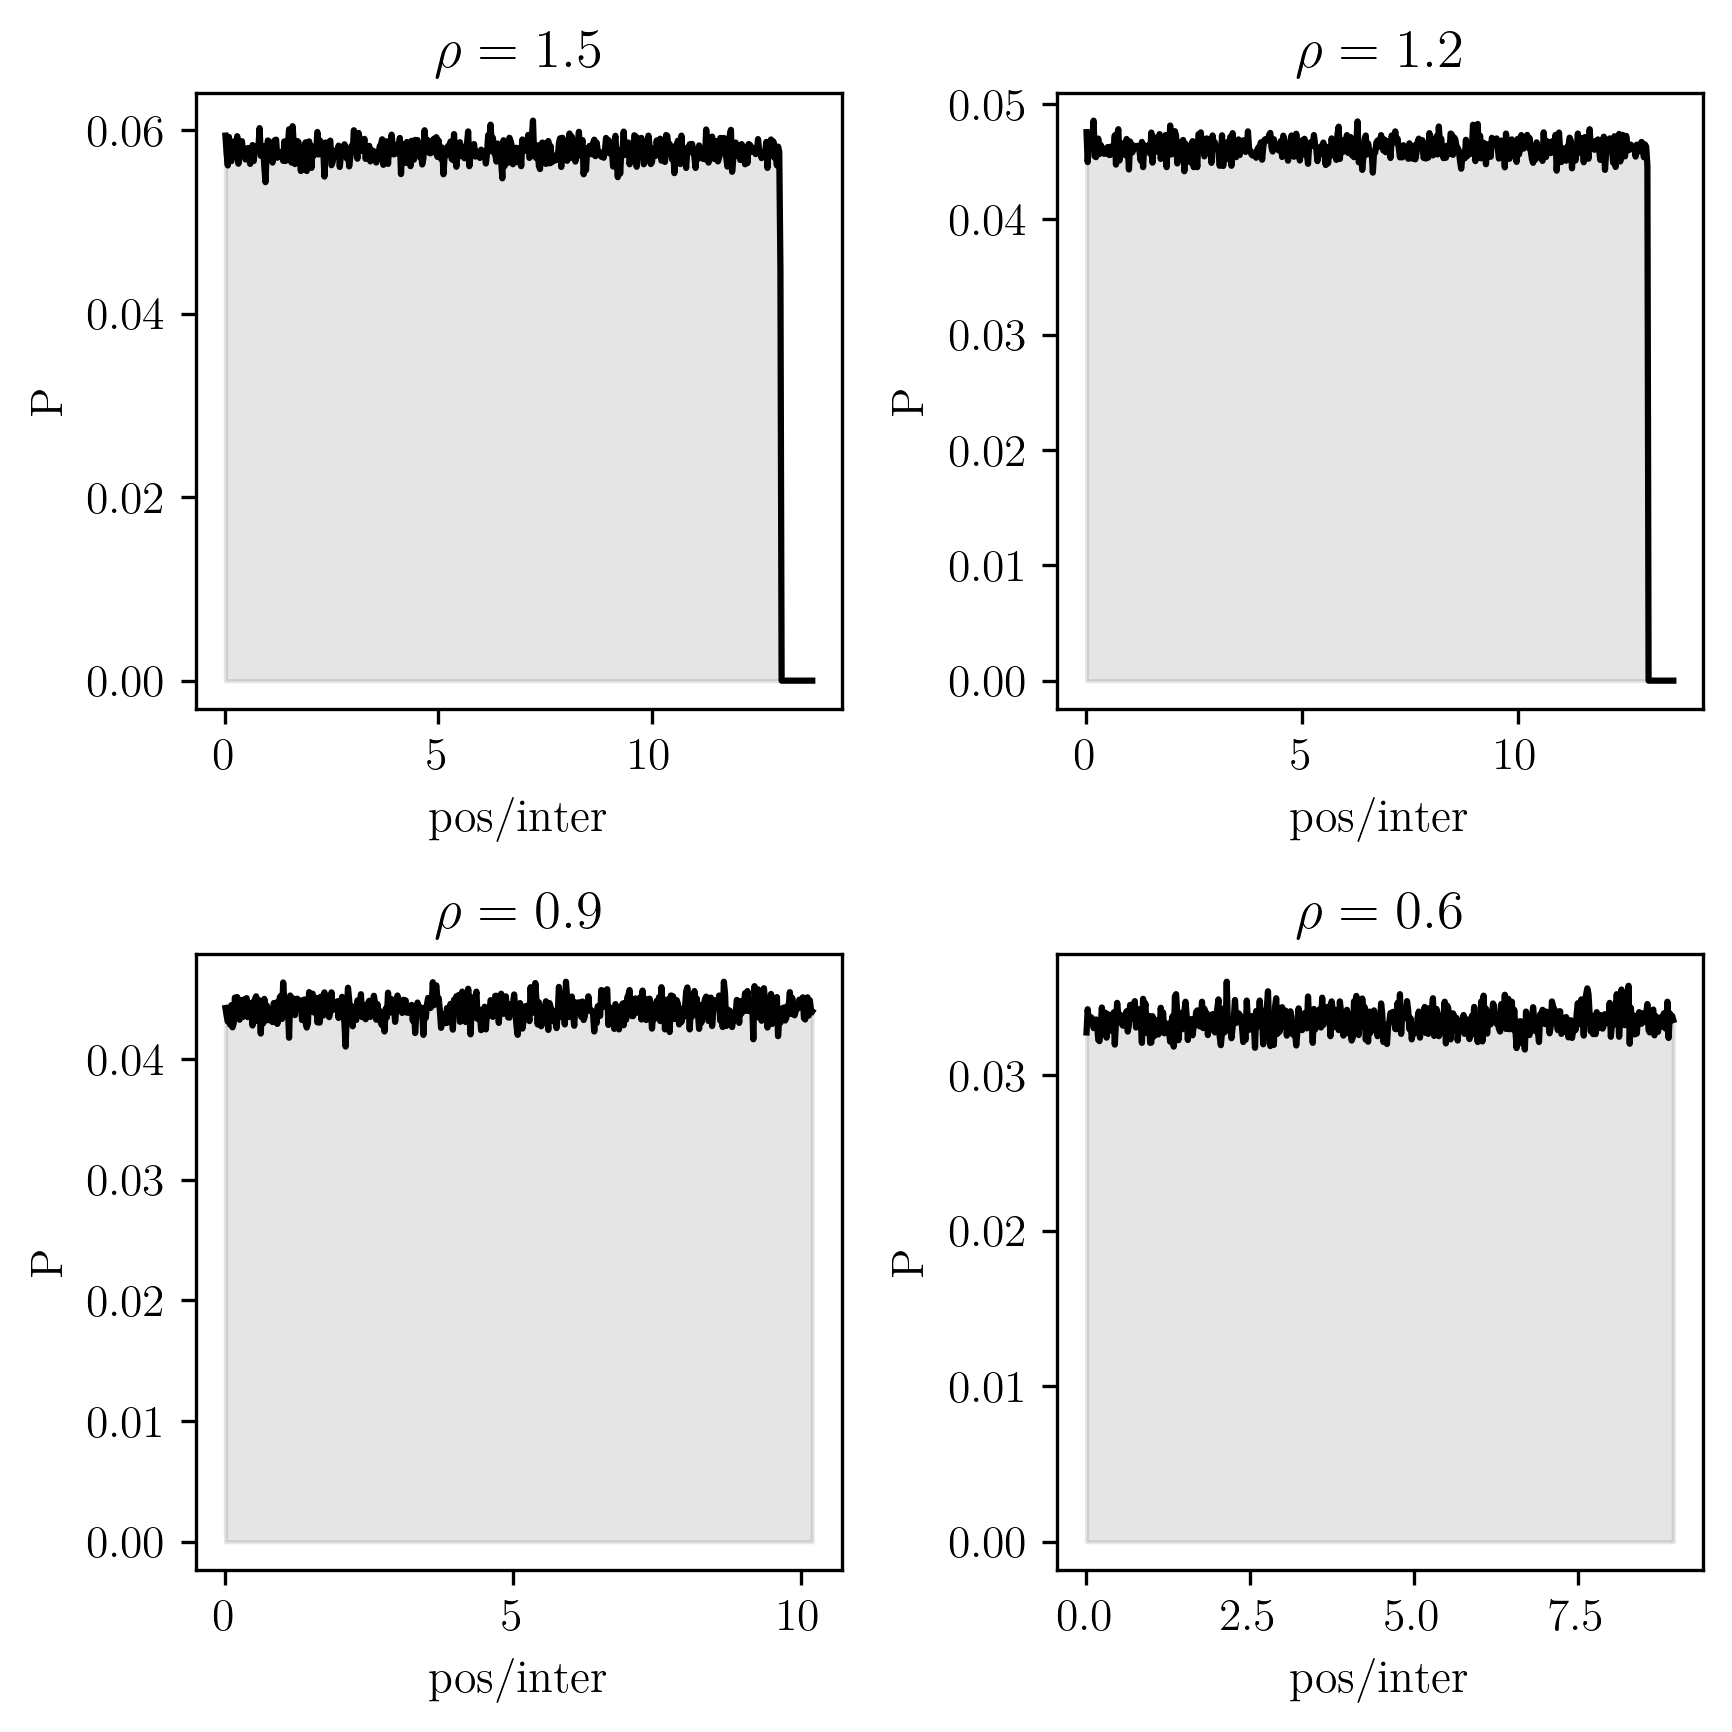

In [9]:
fig,axs = plt.subplots(2,2,figsize=set_size(subplots=(2,2)),dpi=300,sharey=False)

Nbins = 500

for i in range(0,2):
    s = 2/rhos2[i]
    bin_edges = np.linspace(0.01,pos2[i].max()+1,Nbins)
    l = bin_edges[1]-bin_edges[0]
    p,x = np.histogram(pos2[i],bins=bin_edges,density=True)
    x = x[:-1] + (x[1] - x[0])/2   # convert bin edges to centers
    x = x/s
    axs[0,i].plot(x,p,color="black")
    axs[0,i].fill_between(x,np.zeros(Nbins-1),p,alpha=0.1,color="black")
    axs[0,i].set_title(r"$\rho = {}$".format(rhos2[i]))
    axs[0,i].set_ylabel("P")
    axs[0,i].set_xlabel("pos/inter")

for i in range(0,2):
    s = 2/rhos2[i+2]
    bin_edges = np.linspace(0.01,pos2[i+1].max()+1,Nbins)
    l = bin_edges[1]-bin_edges[0]
    p,x = np.histogram(pos2[i+2],bins=bin_edges,density=True)
    x = x[:-1] + (x[1] - x[0])/2   # convert bin edges to centers
    x = x/s
    axs[1,i].plot(x,p,color="black")
    axs[1,i].fill_between(x,np.zeros(Nbins-1),p,alpha=0.1,color="black")
    axs[1,i].set_title(r"$\rho = {}$".format(rhos2[i+2]))
    axs[1,i].set_ylabel("P")
    axs[1,i].set_xlabel("pos/inter")


plt.tight_layout()
#plt.savefig(figurepath/"short_time_r=0.pdf",format="pdf",bbox_inches='tight',dpi=600)
plt.show()

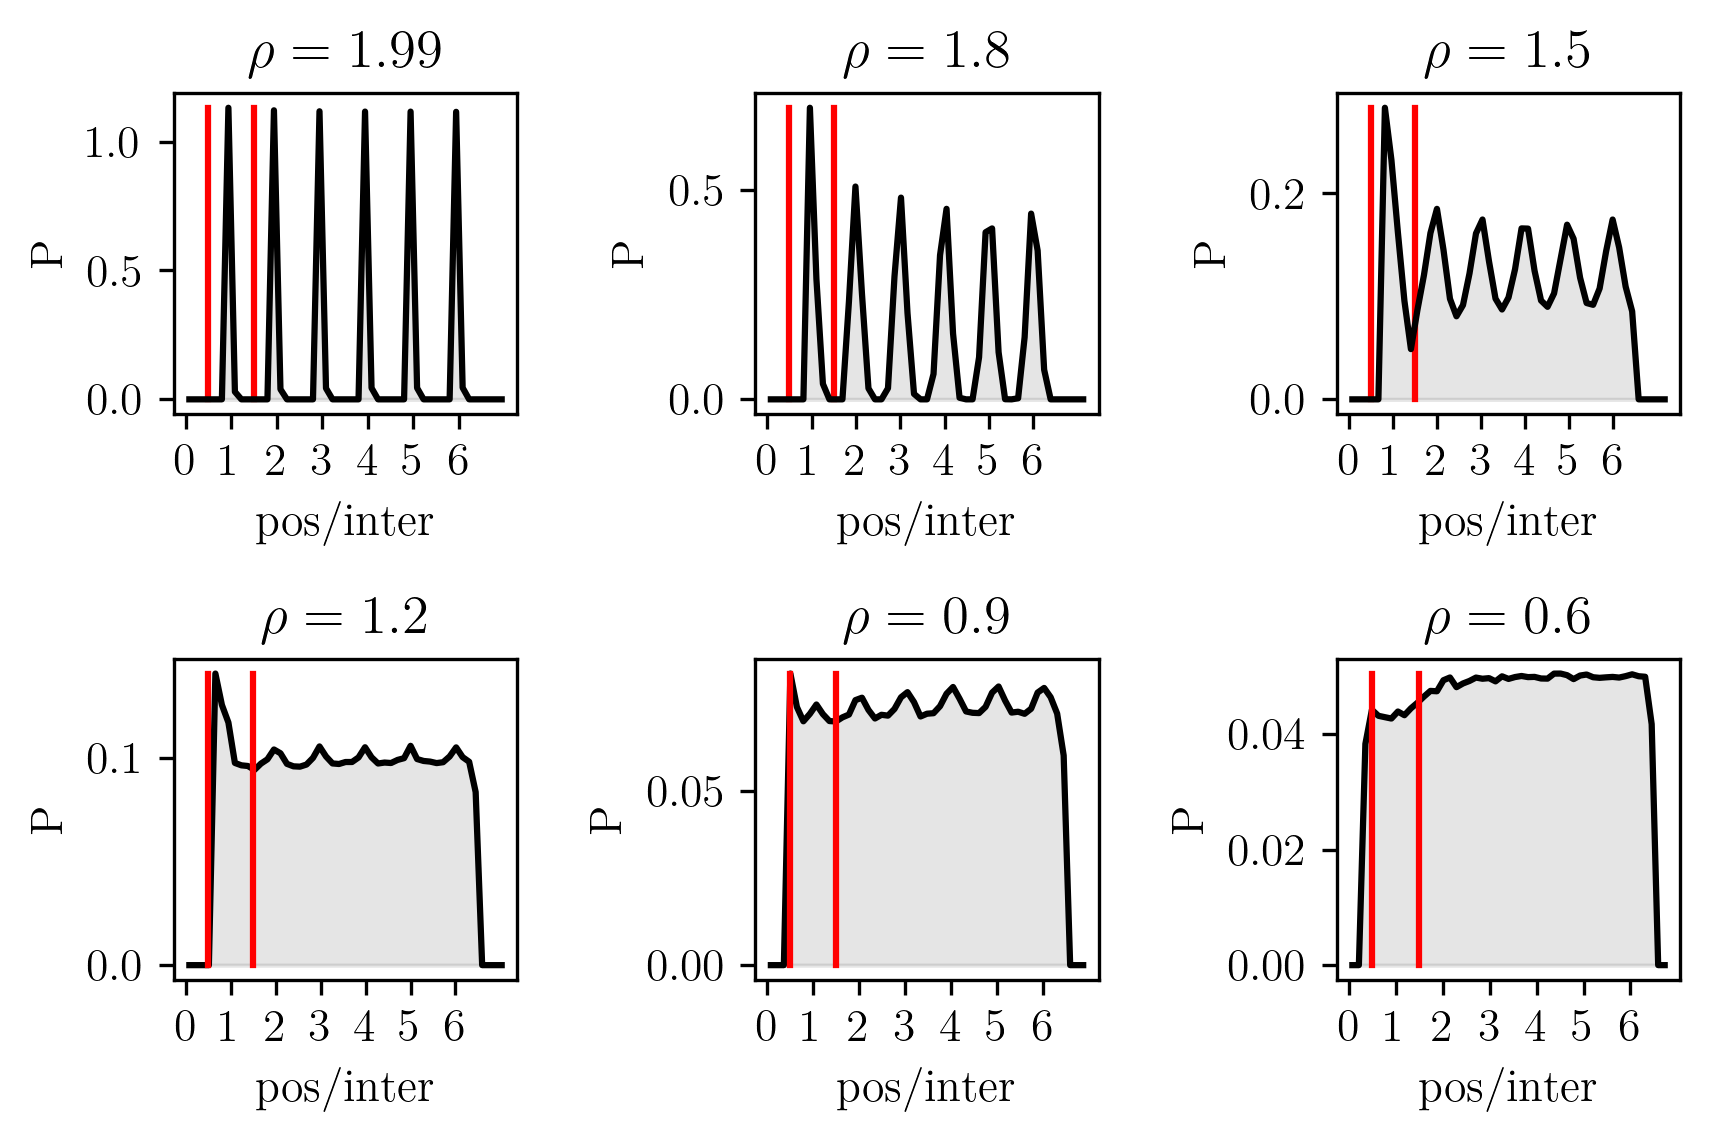

In [22]:
fig,axs = plt.subplots(2,3,figsize=set_size(subplots=(2,3)),dpi=300,sharey=False)

Nbins = 50

for i in range(0,3):
    s = 2/rhos1[i]
    bin_edges = np.linspace(0.01,dist1[i][0,:,:].max()+1,Nbins)
    l = bin_edges[1]-bin_edges[0]
    p,x = np.histogram(dist1[i][0,:,:],bins=bin_edges,density=True)
    x = x[:-1] + (x[1] - x[0])/2   # convert bin edges to centers
    x = x/s
    axs[0,i].plot([1-0.5,1-0.5],[0,p.max()],c="red")
    axs[0,i].plot([1+0.5,1+0.5],[0,p.max()],c="red")
    axs[0,i].plot(x,p,color="black")
    axs[0,i].fill_between(x,np.zeros(Nbins-1),p,alpha=0.1,color="black")
    axs[0,i].set_title(r"$\rho = {}$".format(rhos1[i]))
    axs[0,i].set_ylabel("P")
    axs[0,i].set_xlabel("pos/inter")
    axs[0,i].set_xticks([0,1,2,3,4,5,6])

for i in range(0,3):
    s = 2/rhos1[i+3]
    bin_edges = np.linspace(0.01,dist1[i+3][0,:,:].max()+1,Nbins)
    l = bin_edges[1]-bin_edges[0]
    p,x = np.histogram(dist1[i+3][0,:,:],bins=bin_edges,density=True)
    x = x[:-1] + (x[1] - x[0])/2   # convert bin edges to centers
    x = x/s
    axs[1,i].plot(x,p,color="black")
    axs[1,i].plot([1-0.5,1-0.5],[0,p.max()],c="red")
    axs[1,i].plot([1+0.5,1+0.5],[0,p.max()],c="red")
    axs[1,i].fill_between(x,np.zeros(Nbins-1),p,alpha=0.1,color="black")
    axs[1,i].set_title(r"$\rho = {}$".format(rhos1[i+3]))
    axs[1,i].set_ylabel("P")
    axs[1,i].set_xlabel("pos/inter")
    axs[1,i].set_xticks([0,1,2,3,4,5,6])



plt.tight_layout()
#plt.savefig(figurepath/"short_time_r=0.pdf",format="pdf",bbox_inches='tight',dpi=600)
plt.show()

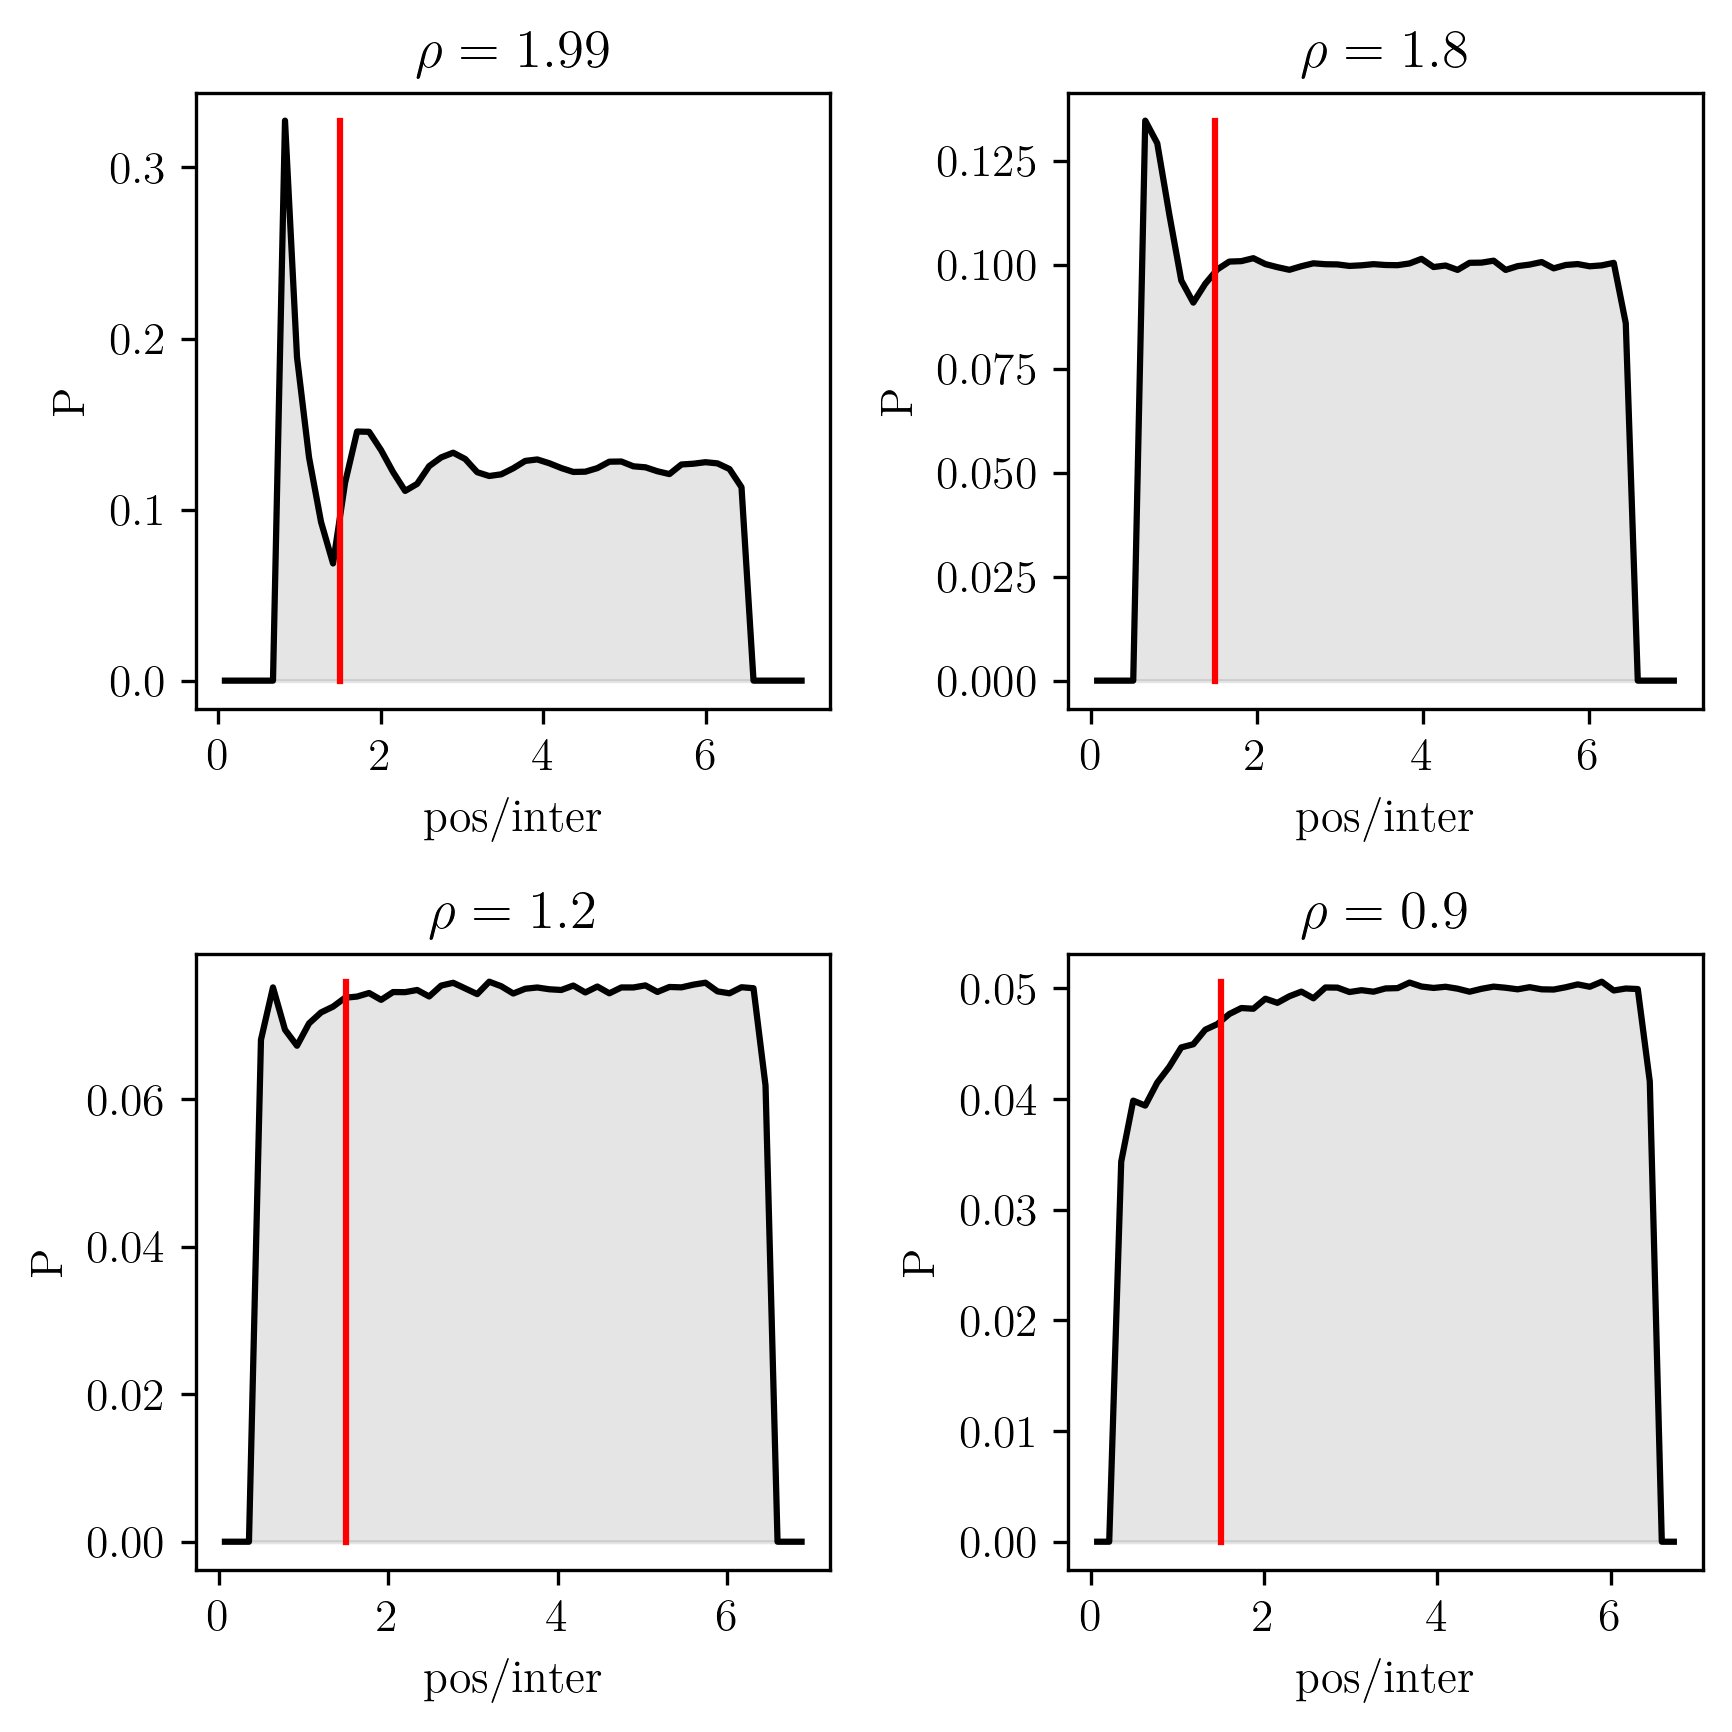

In [20]:
fig,axs = plt.subplots(2,2,figsize=set_size(subplots=(2,2)),dpi=300,sharey=False)

Nbins = 50

for i in range(0,2):
    s = 2/rhos2[i]
    bin_edges = np.linspace(0.01,dist2[i][0,:,:].max()+1,Nbins)
    l = bin_edges[1]-bin_edges[0]
    p,x = np.histogram(dist2[i][0,:,:],bins=bin_edges,density=True)
    x = x[:-1] + (x[1] - x[0])/2   # convert bin edges to centers
    x = x/s
    axs[0,i].plot(x,p,color="black")
    axs[0,i].plot([1+0.5,1+0.5],[0,p.max()],c="red")
    axs[0,i].fill_between(x,np.zeros(Nbins-1),p,alpha=0.1,color="black")
    axs[0,i].set_title(r"$\rho = {}$".format(rhos1[i]))
    axs[0,i].set_ylabel("P")
    axs[0,i].set_xlabel("pos/inter")

for i in range(0,2):
    s = 2/rhos2[i+2]
    bin_edges = np.linspace(0.01,dist2[i+2][0,:,:].max()+1,Nbins)
    l = bin_edges[1]-bin_edges[0]
    p,x = np.histogram(dist2[i+2][0,:,:],bins=bin_edges,density=True)
    x = x[:-1] + (x[1] - x[0])/2   # convert bin edges to centers
    x = x/s
    axs[1,i].plot(x,p,color="black")
    axs[1,i].plot([1+0.5,1+0.5],[0,p.max()],c="red")
    axs[1,i].fill_between(x,np.zeros(Nbins-1),p,alpha=0.1,color="black")
    axs[1,i].set_title(r"$\rho = {}$".format(rhos1[i+3]))
    axs[1,i].set_ylabel("P")
    axs[1,i].set_xlabel("pos/inter")


plt.tight_layout()
#plt.savefig(figurepath/"short_time_r=0.pdf",format="pdf",bbox_inches='tight',dpi=600)
plt.show()

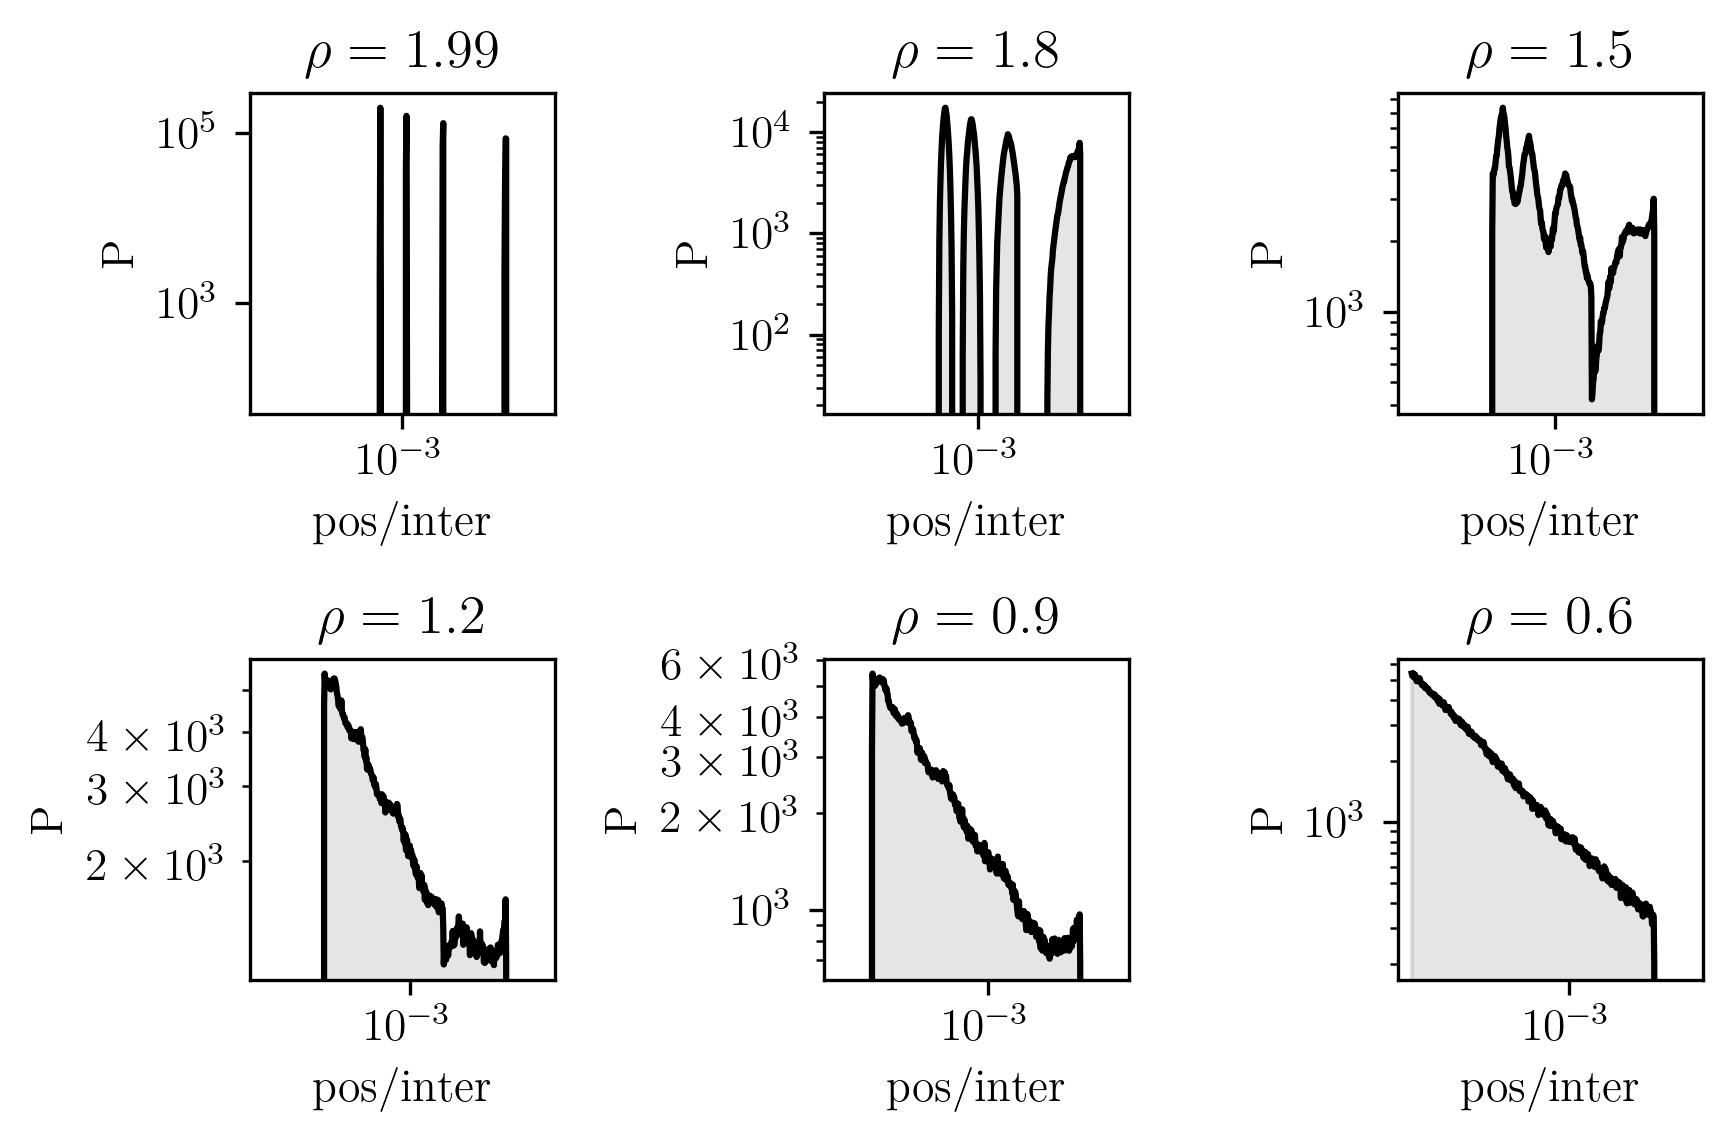

In [22]:
fig,axs = plt.subplots(2,3,figsize=set_size(subplots=(2,3)),dpi=300,sharey=False)

Nbins = 500

for i in range(0,3):
    s = 2/rhos1[i]
    bin_edges = 10.0  ** np.linspace(-7,1,Nbins)
    l = bin_edges[1]-bin_edges[0]
    p,x = np.histogram((Js1[i][0,:,:])[np.isfinite(Js1[i][0,:,:])],bins=bin_edges,density=False)
    x = x[:-1] + (x[1] - x[0])/2   # convert bin edges to centers
    x = x/s
    axs[0,i].plot(x,p,color="black")
    axs[0,i].fill_between(x,np.zeros(Nbins-1),p,alpha=0.1,color="black")
    axs[0,i].set_title(r"$\rho = {}$".format(rhos1[i]))
    axs[0,i].set_ylabel("P")
    axs[0,i].set_xlabel("pos/inter")
    axs[0,i].set_yscale("log")
    axs[0,i].set_xscale("log")

for i in range(0,3):
    s = 2/rhos1[i+3]
    bin_edges = 10.0  ** np.linspace(-7,1,Nbins)
    l = bin_edges[1]-bin_edges[0]
    p,x = np.histogram((Js1[i+3][0,:,:])[np.isfinite(Js1[i+3][0,:,:])],bins=bin_edges,density=False)
    x = x[:-1] + (x[1] - x[0])/2   # convert bin edges to centers
    x = x/s
    axs[1,i].plot(x,p,color="black")
    axs[1,i].fill_between(x,np.zeros(Nbins-1),p,alpha=0.1,color="black")
    axs[1,i].set_title(r"$\rho = {}$".format(rhos1[i+3]))
    axs[1,i].set_ylabel("P")
    axs[1,i].set_xlabel("pos/inter")
    axs[1,i].set_yscale("log")
    axs[1,i].set_xscale("log")


plt.tight_layout()
#plt.savefig(figurepath/"short_time_r=0.pdf",format="pdf",bbox_inches='tight',dpi=600)
plt.show()

# Testing

In [241]:
Nbins = 500
i = 4
s = 2/rhos1[i]
bin_edges = np.linspace(0,pos1[i].max()+1,Nbins)
l = bin_edges[1]-bin_edges[0]
p,x = np.histogram(pos1[i],bins=bin_edges,density=False)
x = x[:-1] + (x[1] - x[0])/2   # convert bin edges to centers
x = x/s

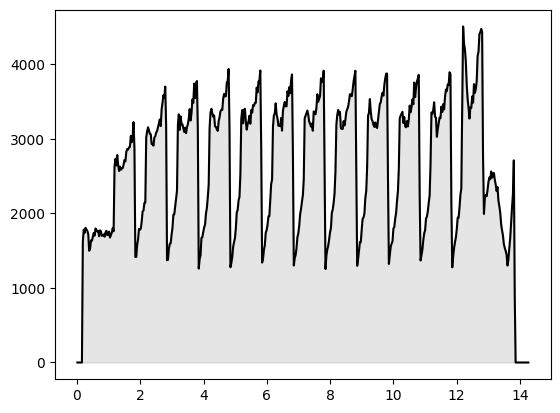

In [242]:
plt.plot(x,p,color="black")
plt.fill_between(x,np.zeros(499),p,alpha=0.1,color="black")

In [302]:
Nbins = 500
i = 4
s = 2/rhos1[i]
bin_edges = np.linspace(0.01,dist1[i].max()+1,Nbins)
l = bin_edges[1]-bin_edges[0]
p,x = np.histogram(dist1[i],bins=bin_edges,density=True)
x = x[:-1] + (x[1] - x[0])/2   # convert bin edges to centers
x = x/s

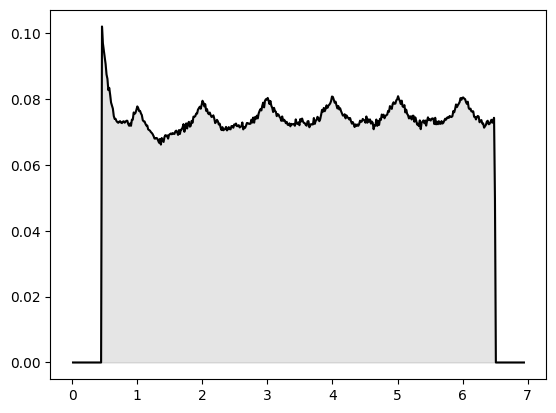

In [255]:
plt.plot(x,p,color="black")
plt.fill_between(x,np.zeros(499),p,alpha=0.1,color="black")

In [306]:
Nbins = 500
i = 1
bin_edges = 10.0  ** np.linspace(-10,1,Nbins)
l = bin_edges[1]-bin_edges[0]
p,x = np.histogram(Js1[i][np.isfinite(Js1[i])],bins=bin_edges,density=False)
x = x[:-1] + (x[1] - x[0])/2   # convert bin edges to centers

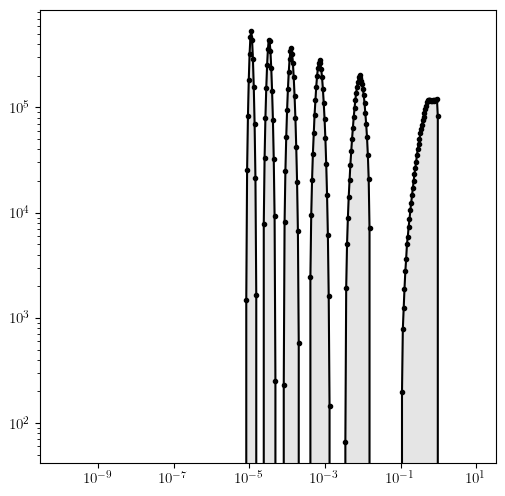

In [307]:
plt.plot(x,p,color="black",marker=".")
plt.fill_between(x,np.zeros(499),p,alpha=0.1,color="black")
plt.xscale("log")
plt.yscale("log")